In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [5]:
raw_data = pd.read_csv('car.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [7]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Data Clean

In [8]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [10]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [11]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


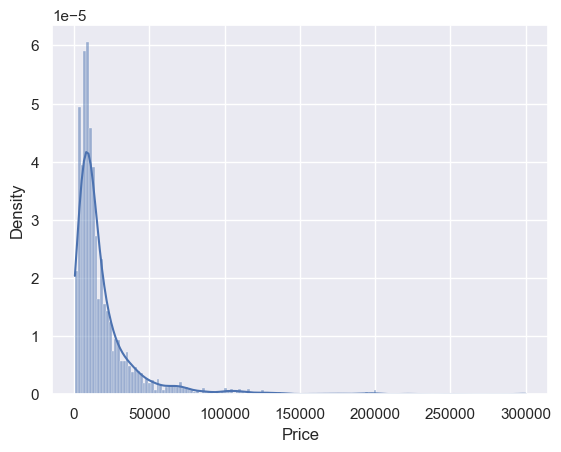

In [14]:
sns.histplot(data_no_mv['Price'], kde=True, stat="density")
plt.show()

In [15]:
# delete the top 1% outliers 
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


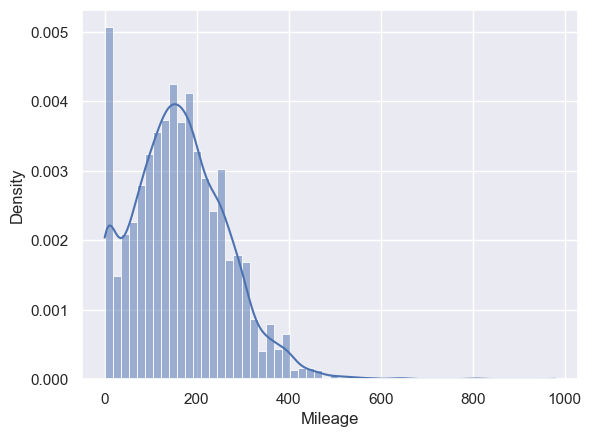

In [16]:
sns.histplot(data_no_mv['Mileage'], kde=True, stat="density")
plt.show()

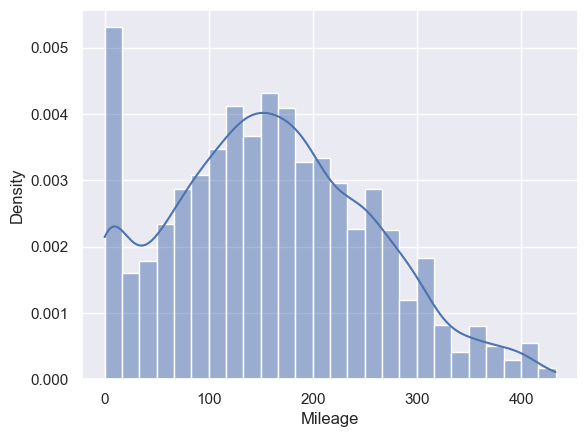

In [17]:
q = data_no_mv['Mileage'].quantile(0.99)
data_2 = data_no_mv[data_no_mv['Mileage'] < q]
sns.histplot(data_2['Mileage'], kde=True, stat="density")
plt.show()

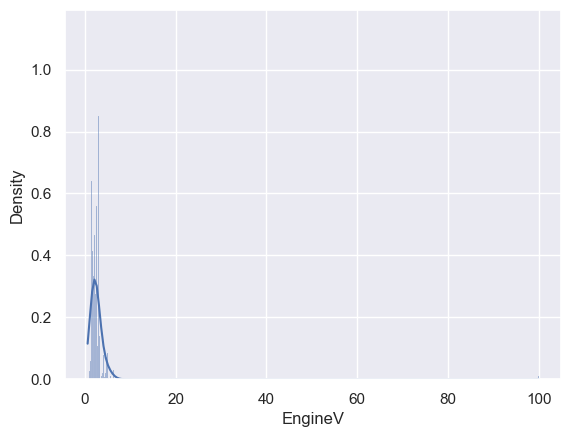

In [19]:
sns.histplot(data_no_mv['EngineV'], kde=True, stat="density")
plt.show()

In [20]:
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis=0)
EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


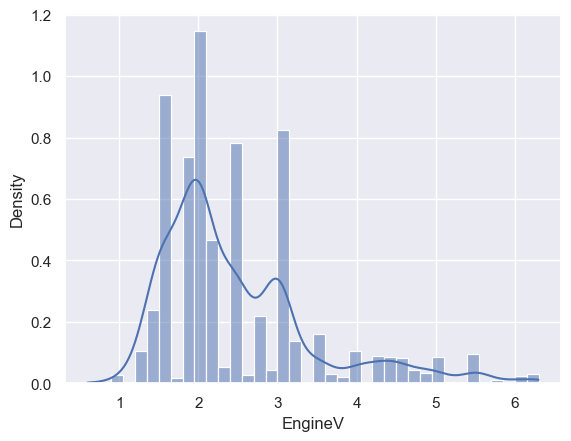

In [21]:
data_3 = data_2[data_2['EngineV'] < 6.5]
sns.histplot(data_3['EngineV'], kde=True, stat="density")
plt.show()

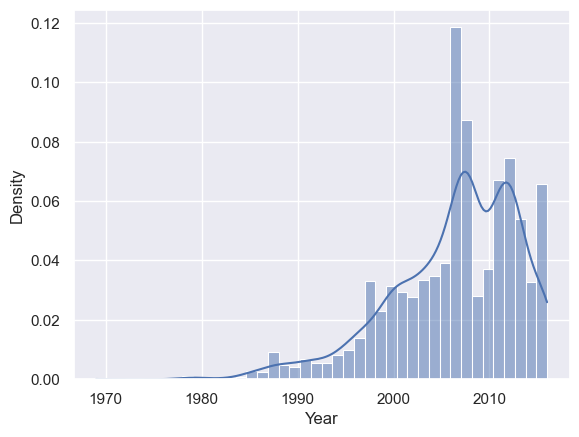

In [22]:
sns.histplot(data_no_mv['Year'], kde=True, stat="density")
plt.show()

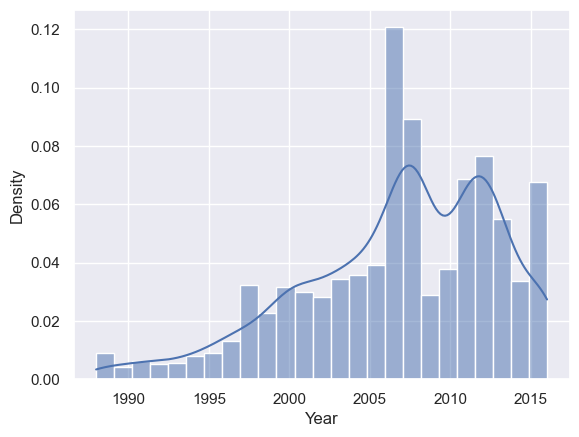

In [24]:
q = data_no_mv['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]
sns.histplot(data_4['Year'], kde=True, stat="density")
plt.show()

In [26]:
data_cleaned = data_4.reset_index(drop=True)

In [27]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3907,3907.000000,3907,3907.000000,3907.000000,3907,3907,3907.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1472,NaN,NaN,1815,3545,NaN
mean,NaN,19960.692119,NaN,158.929358,2.474771,NaN,NaN,2006.798055
std,NaN,26048.838086,NaN,96.242696,0.978819,NaN,NaN,6.127291
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7274.500000,NaN,89.500000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# OLS assumption

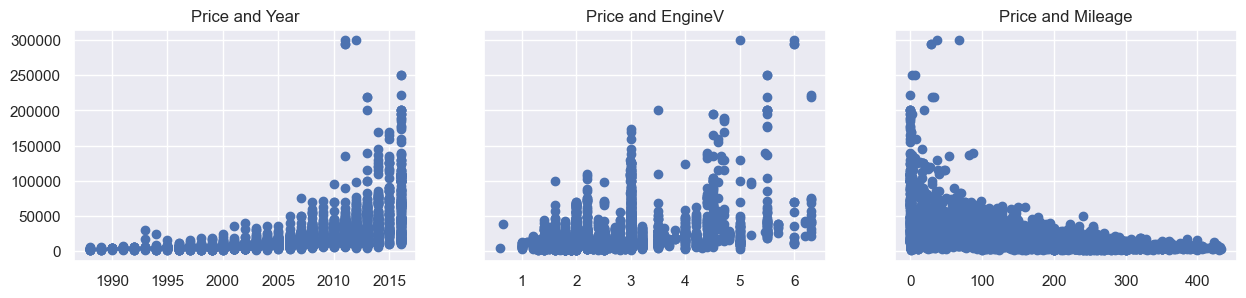

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned["Price"])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned["Price"])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned["Price"])
ax3.set_title('Price and Mileage')

plt.show()

In [30]:
# not linear, transform variables
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3902,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3903,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3904,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3905,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


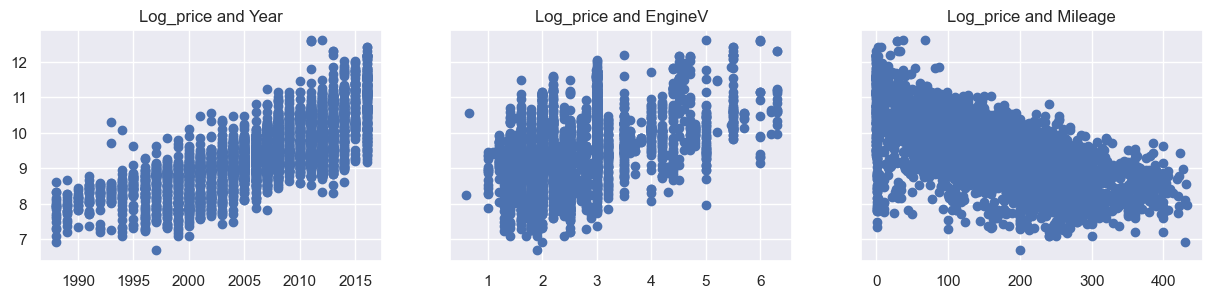

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned["log_price"])
ax1.set_title('Log_price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned["log_price"])
ax2.set_title('Log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned["log_price"])
ax3.set_title('Log_price and Mileage')

plt.show()

In [32]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

# Multicollinearity

In [33]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [34]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', "EngineV"]]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [35]:
vif

,VIF,features
0,3.703266,Mileage
1,10.323287,Year
2,7.400348,EngineV


In [36]:
data_no_multi = data_cleaned.drop(['Year'], axis=1)

# Create dummy variables

In [37]:
data_with_dummies = pd.get_dummies(data_no_multi, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [39]:
variables = data_with_dummies[['Brand_Toyota', 'Body_hatch', "Engine Type_Gas"]]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [40]:
vif

,VIF,features
0,0.544509,Brand_Toyota
1,1.024730,Body_hatch
2,0.107665,Engine Type_Gas


# Rearrange

In [41]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [42]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [44]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression

In [45]:
target = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

## scale the data

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [47]:
inputs_scaled = scaler.transform(inputs)

## Train & test

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

In [50]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [51]:
y_hat = reg.predict(x_train)

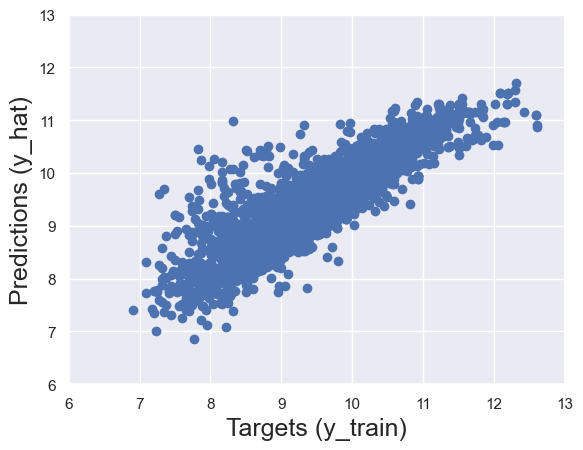

In [53]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

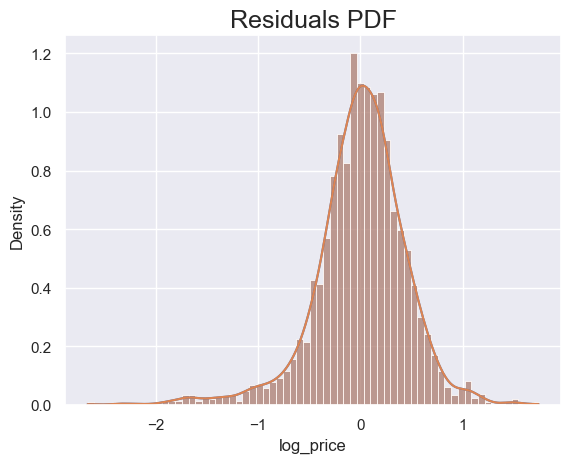

In [55]:
# residual plot
sns.histplot(y_train - y_hat, kde=True, stat="density")
plt.title('Residuals PDF', size=18)
plt.show()

In [56]:
reg.score(x_train, y_train)

0.7520453281718504

In [57]:
reg.intercept_

9.43753512973232

In [58]:
reg.coef_

array([-0.47713375,  0.25279341,  0.02659834,  0.03600588, -0.12726982,
       -0.16670307, -0.04848545, -0.07180363, -0.14024984, -0.09622117,
       -0.19162974, -0.10890609, -0.15699644, -0.12248327, -0.03067591,
       -0.14136631,  0.31071348])

In [59]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_

In [60]:
reg_summary

,Features,Weights
0,Mileage,-0.477134
1,EngineV,0.252793
2,Brand_BMW,0.026598
3,Brand_Mercedes-Benz,0.036006
4,Brand_Mitsubishi,-0.127270
5,Brand_Renault,-0.166703
6,Brand_Toyota,-0.048485
7,Brand_Volkswagen,-0.071804
8,Body_hatch,-0.140250
9,Body_other,-0.096221


In [61]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [63]:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [64]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

# Test

In [65]:
y_hat_test = reg.predict(x_test)

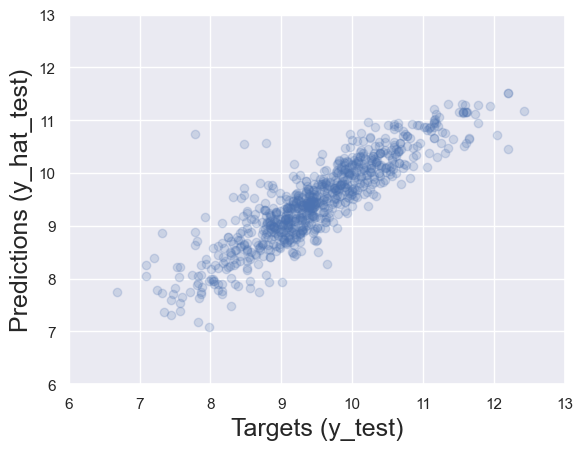

In [67]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [69]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,2497.123713
1,7456.534893
2,13496.814274
3,7573.105796
4,16502.817902


In [70]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,2497.123713,NaN
1,7456.534893,7900.0
2,13496.814274,NaN
3,7573.105796,NaN
4,16502.817902,NaN


In [71]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.495542
1    9.287301
2    9.609116
3    9.305651
4    9.740910
Name: log_price, dtype: float64

In [73]:
df_pf['Target'] = np.exp(y_test)
df_pf.head(20)

,Prediction,Target
0,2497.123713,1800.0
1,7456.534893,10800.0
2,13496.814274,14900.0
3,7573.105796,11000.0
4,16502.817902,16999.0
5,8782.094579,8900.0
6,36938.431408,107000.0
7,5129.054009,6900.0
8,19320.017790,35000.0
9,10696.319898,19995.0


In [74]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [75]:
df_pf['Difference%'] = np.absolute(df_pf['Residual'] / df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,2497.123713,1800.0,-697.123713,38.729095
1,7456.534893,10800.0,3343.465107,30.958010
2,13496.814274,14900.0,1403.185726,9.417354
3,7573.105796,11000.0,3426.894204,31.153584
4,16502.817902,16999.0,496.182098,2.918890
...,...,...,...,...
777,1866.980599,1950.0,83.019401,4.257405
778,22010.975542,21335.0,-675.975542,3.168388
779,7804.297565,13500.0,5695.702435,42.190388
780,6923.705483,6200.0,-723.705483,11.672669


In [77]:
# pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
54,32385.60,32400.00,14.40,0.04
662,46574.25,46500.00,-74.25,0.16
384,17600.14,17639.47,39.33,0.22
526,54866.55,55000.00,133.45,0.24
240,8278.72,8300.00,21.28,0.26
...,...,...,...,...
772,9508.35,2750.00,-6758.35,245.76
59,7126.24,1500.00,-5626.24,375.08
88,39080.14,6500.00,-32580.14,501.23
444,38529.33,4800.00,-33729.33,702.69
